In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [2]:
# Set directory and file structure
umap_dir <- file.path("results")
plate4_name <- "localhost231120090001"
umap_file <- "UMAP_localhost231120090001_sc_feature_selected.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)


output_fig_dir <- file.path("figures")
umap_prefix <- "UMAP_"

# Define output figure path
output_umap_file <- file.path(
    output_fig_dir,
    paste0(umap_prefix, plate4_name)
)

print(output_umap_file)

[1] "figures/UMAP_localhost231120090001"


In [19]:
# Load in the umap data
df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "c",
        "UMAP0" = "d",
        "UMAP1" = "d"
    )
)
cell_count_df <- df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count() %>%
    dplyr::rename(Metadata_Cell_Count = n)

umap_cp_df <- df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well")

head(umap_cp_df)

Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,Metadata_Image_Count_Cells,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_Nuclei_Number_Object_Number,Metadata_Site,UMAP0,UMAP1,Metadata_Cell_Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
B,2,2,Healthy,NA,NA,520.8492090982566,277.58341992841474,20,1.0,NA,B02,6.0,6.0,8.0,8.0,f00,2.3316522,-0.6809319,351
B,2,2,Healthy,NA,NA,313.6611095802333,374.44998622209977,20,1.0,NA,B02,7.0,7.0,9.0,9.0,f00,0.2430991,-2.5688775,351
B,2,2,Healthy,NA,NA,709.4963827990158,379.6529323197826,20,1.0,NA,B02,8.0,8.0,10.0,10.0,f00,-1.6688716,-1.2206026,351
B,2,2,Healthy,NA,NA,869.85137767882,511.15460617868075,20,1.0,NA,B02,9.0,9.0,12.0,12.0,f00,1.8655936,-1.0452013,351
B,2,2,Healthy,NA,NA,588.9673724559642,503.9367071278635,20,1.0,NA,B02,10.0,10.0,13.0,13.0,f00,-0.7418514,-1.0591240,351
B,2,2,Healthy,NA,NA,748.3667362560891,576.6082115518441,20,1.0,NA,B02,11.0,11.0,14.0,14.0,f00,0.9835247,-1.4865377,351


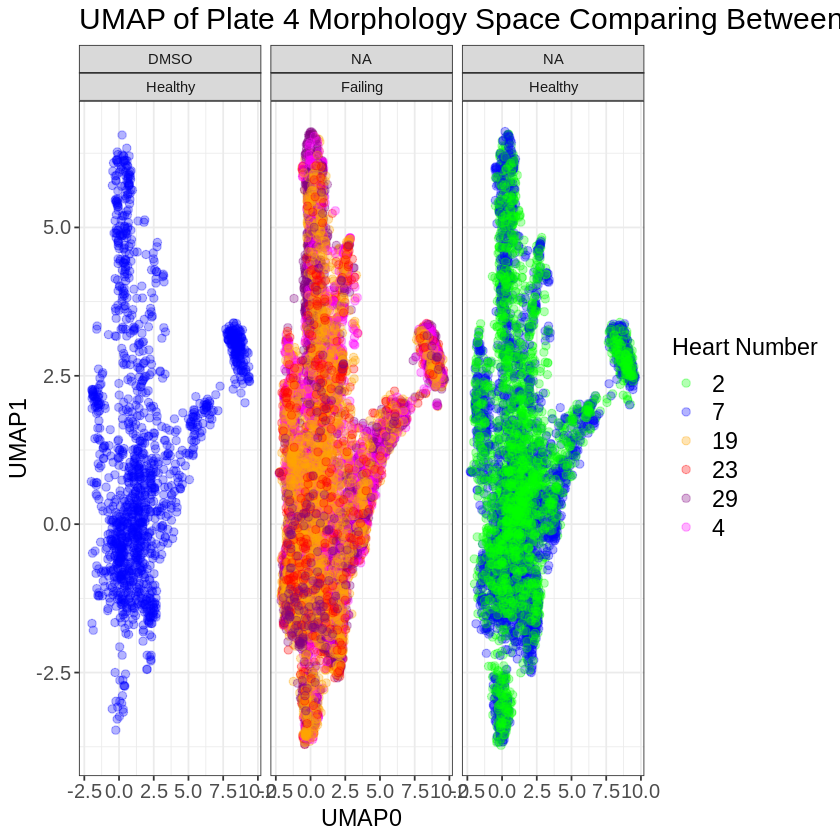

In [32]:
# Create UMAP labelled with the anomaly score as gradient
umap_heart_num_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1, color = Metadata_heart_number)) +
  geom_point(size = 2, alpha = 0.3) +
  scale_color_manual(name = "Heart Number",   
        values = c(
          "2" = "#00FF00",     
          "7" = "#0000FF",     
          "19" = "#FFA500",   
          "23" = "#FF0000",    
          "29" = "#800080",    
          "4" = "#FF00FF"      
        ),
        breaks = c("2", "7", "19", "23", "29", "4"),  
        labels = c("2", "7", "19", "23", "29", "4")
  ) +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing Between Heart Numbers", x = "UMAP0", y = "UMAP1") +
  theme_bw() +
  theme(
    # Increase title size
    plot.title = element_text(size = 18),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
    
    # # Increase point size
    # plot.margin = margin(1,1,1,1, "cm")
  ) +
  facet_wrap(Metadata_treatment ~ Metadata_cell_type)

# saving image
output_file <- paste0(output_umap_file, "_heart_number.png")
ggsave(output_file, umap_heart_num_figure, dpi = 500, height = 10, width = 14)

print(umap_heart_num_figure)

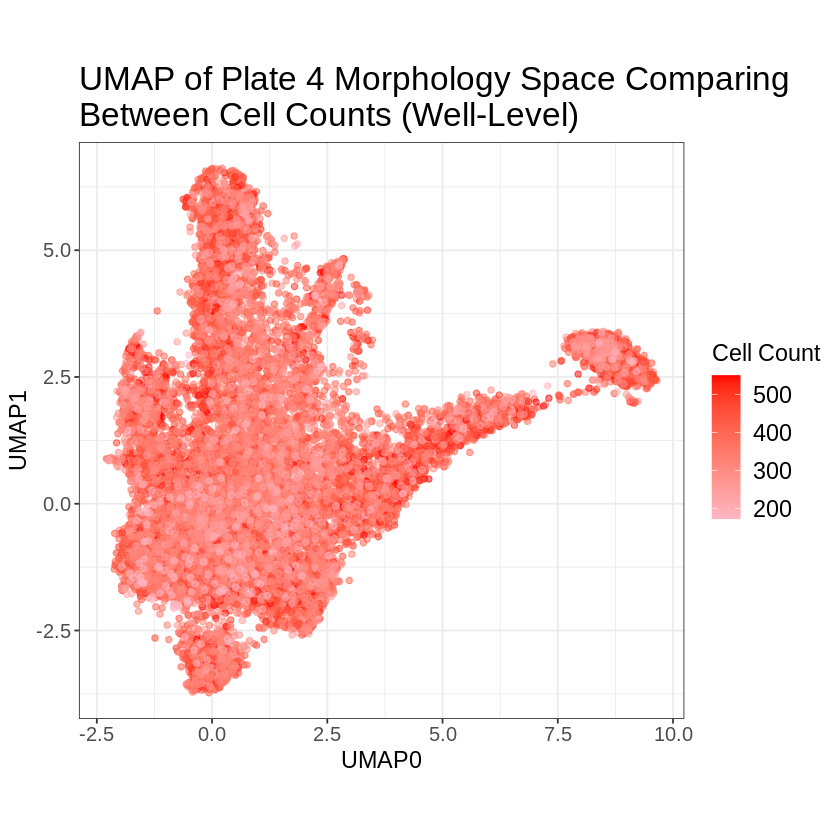

In [43]:
umap_cell_count_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_Cell_Count), alpha = 0.5) +
  theme_bw() +
  scale_color_continuous(
    name = "Cell Count", 
    low = "light pink",
    high = "red"
  ) +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing\nBetween Cell Counts (Well-Level)", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  ) +
  coord_fixed(1.1)

# saving image
output_file <- paste0(output_umap_file, "_well_cell_count.png")
ggsave(output_file, umap_cell_count_figure, dpi = 500, height = 10, width = 12)


print(umap_cell_count_figure)

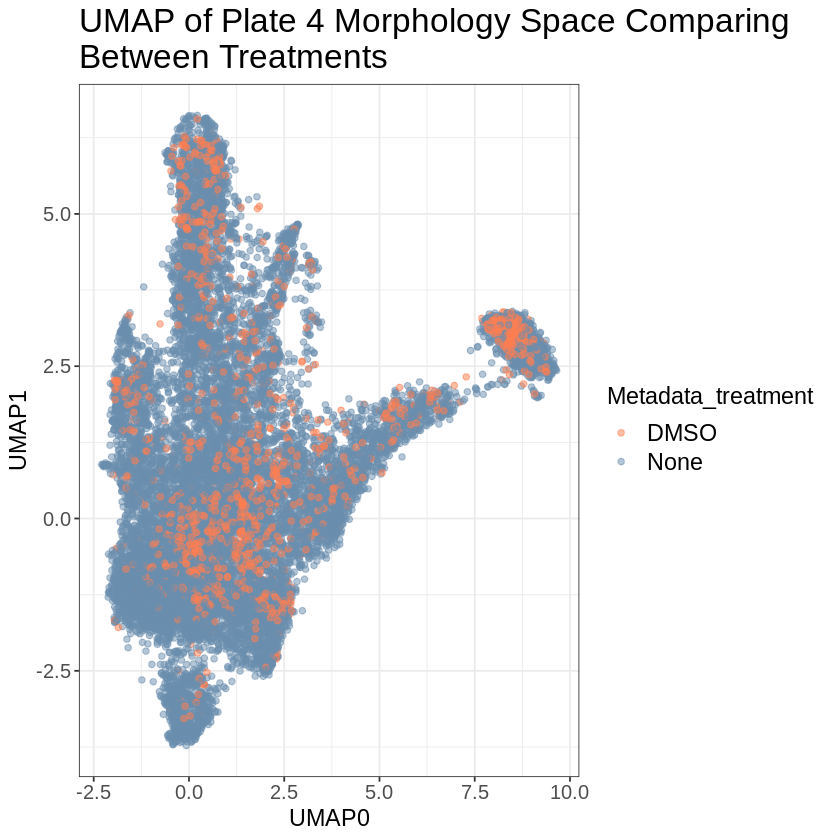

In [45]:
# Set NA values as "None"
umap_cp_df$Metadata_treatment <- ifelse(is.na(umap_cp_df$Metadata_treatment), "None", umap_cp_df$Metadata_treatment)

umap_treatment_figure <- 
  ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), alpha = 0.5) +
  scale_color_manual(values = c("DMSO" = "#FF7F50", "None" = "#6B8EAD")) +
  theme_bw() +
  labs(title = "UMAP of Plate 4 Morphology Space Comparing\nBetween Treatments", x = "UMAP0", y = "UMAP1") +
  theme(
    # Increase title size
    plot.title = element_text(size = 20),
    
    # Increase axis text size
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    
    # Increase legend size
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 14),
  )

# saving image
output_file <- paste0(output_umap_file, "_treatment.png")
ggsave(output_file, umap_treatment_figure, dpi = 500, height = 10, width = 10)


print(umap_treatment_figure)